# Fundamental Analysis of Airline Stocks 

Fundamental Analsysis is the analysis of company financial statements to determine how well a company is being managed.  Fundamental Analysis helps investors know which companies are doing well and which are not it also helps determine whether a security is under or overvalued.  

Due to the Coronavirus wreaking havoc on the stock market and especially airline stocks I wanted to look at some basic financial metrics to see which companies are well run and which are not.  

This analysis utilizes <a href="http://www.sharadar.com/">Sharadar US Core Fundamental Data</a>from December 2015 to December 2019.



#### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from IPython.display import IFrame, HTML

#### Set default parameters

In [2]:
rcParams['figure.figsize'] = 15,8
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

#### Import Dataset

In [3]:
stocks = pd.read_csv('stock_fundamentals.csv')

In [4]:
stocks.head()

,None,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,0,UAL,MRY,2019-12-31,2019-12-31,2019-12-31,2020-02-25,-718000000,52611000000,5.189975e+10,...,253043650,253043650,NaN,170.955,45079000000,0,905000000,1736000000,178.147,-6744000000
1,1,UAL,MRY,2018-12-31,2018-12-31,2018-12-31,2020-02-25,-803000000,49024000000,4.564250e+10,...,272464412,272464412,NaN,151.590,41342000000,0,526000000,828000000,151.734,-6745000000
2,2,UAL,MRY,2017-12-31,2017-12-31,2017-12-31,2020-02-25,-1147000000,42346000000,4.216575e+10,...,296252435,296252435,NaN,127.540,34284000000,0,880000000,204000000,115.726,-5630000000
3,3,UAL,MRY,2016-12-31,2016-12-31,2016-12-31,2020-02-25,-829000000,40140000000,4.032900e+10,...,317285583,317285583,NaN,115.221,31985000000,655000000,1539000000,0,100.808,-4977000000
4,4,UAL,MRY,2015-12-31,2015-12-31,2015-12-31,2020-02-25,-831000000,40861000000,4.029700e+10,...,372810266,372810266,NaN,101.564,32202000000,2037000000,-3121000000,0,86.376,-4586000000


In [5]:
stocks.shape

(722, 112)

## Data Dimensions 
There are six different report types for financial statement reports in this data set:

- As reported - Originally reported data excludes restatements

- Most Recent Report - Includes restatements

- Annual Report(Y) - Annual observations

- Trailing Twelve Months(T) -  Quarterly observations of one year duration

- Quarterly (Q) - Quarterly observations of quarterly duration 


In [6]:
#Filter by report
#Most Recent Quarter
MRQ = stocks['dimension']=='MRQ'
#Most recent year
MRY = stocks['dimension']=='MRY'
#Most recent trailing 12 months
MRT = stocks['dimension']=='MRT'
#As reported Quarter
ARQ = stocks['dimension']=='ARQ'
#As reported Year
ARY = stocks['dimension']=='ARY'
#As reported 12 months
ART = stocks['dimension']=='ART'

#### Filter data by report type

In [7]:
MRQ = stocks[MRQ]
MRY = stocks[MRY]
MRT = stocks[MRT]
ARQ = stocks[ARQ]
ARY = stocks[ARY]
ART = stocks[ART]

In [8]:
MRQ.shape

(160, 112)

### SInce there are so many dimensions I am going to create a function to look at specific columns that I can then compare against financial statements to verify the data is good.

In [9]:
# This function is to help verify which columns belong to which items on the financial statements
# Creating a function to filter out:
#1. Delta Airlines stocks 
#2. reporting periods 2019-12-31','2018-12-31, 
#3 dimensions:'MRY','MRT','MRQ','ARY','ART','ARQ'
#4 arguments are coi = column of interest & number of digits to the left of the decimal point.



def coi(col,tens):

    DAL = stocks['ticker'] == 'DAL'
    DAL = stocks[DAL]
    dimension = ['MRY','MRT','MRQ','ARY','ART','ARQ']
    report_period = ['2019-12-31','2018-12-31']
    filtered = DAL[DAL.reportperiod.isin(report_period) & DAL.dimension.isin(dimension)]
    rc = filtered[['ticker','dimension','reportperiod']]

    if tens == 11: 
        t = 1
    elif tens == 10: 
        t = 10
    elif tens == 9:
        t = 100
    elif tens == 8: 
        t = 1000
    elif tens == 7: 
        t = 10000
    elif tens == 6:
        t = 100000
    elif tens == 5:  
        t = 1000000
    elif tens == 4: 
        t = 10000000
    elif tens == 3:
        t = 100000000
    elif tens == 2: 
        t = 1000000000
    elif tens == 1:
        t = 10000000000
    else:
        print('invalid value choose a value between 1 and 11 ')

    coi = filtered[col]/t
    merged = pd.concat([rc,coi],axis=1,join='inner')
    pd.options.display.float_format = '{:,.2f}'.format
    result = merged
    return result



# Delta Airlines Financial Statements 

Below I have embedded Delta Airlines financial statements for Q4 of 2019.  The column of interest function(COI) can be used to look at specific dimensions of the dataset to see if it matches Delta's published financial reports.

#### Financial Statements consist of three reports: 

- Income Statement page 5
- Balance Sheet page 9
- Statement of Cashflows page 8 

In [10]:
IFrame(src='https://s2.q4cdn.com/181345880/files/doc_financials/2019/q4/Delta-Air-Lines-Announces-December-Quarter-and-Full-Year-2019-Profit.pdf', width=900, height=1000)

In [11]:
# Choose a column and the number of digits to the left of the decimal point
coi('revenue',5)

,ticker,dimension,reportperiod,revenue
452,DAL,MRY,2019-12-31,"47,007.00"
453,DAL,MRY,2018-12-31,"44,438.00"
457,DAL,MRT,2019-12-31,"47,007.00"
461,DAL,MRT,2018-12-31,"44,438.00"
477,DAL,MRQ,2019-12-31,"11,439.00"
481,DAL,MRQ,2018-12-31,"10,742.00"
497,DAL,ARY,2019-12-31,"47,007.00"
498,DAL,ARY,2018-12-31,"44,438.00"
502,DAL,ART,2019-12-31,"47,007.00"
506,DAL,ART,2018-12-31,"44,438.00"


Using the column of interest coi() function we can see that Total Operating Revenue on page 5 matches both line 477 and 522 of the dataframe above, so the financial report dimensions that matches the PDF financial report are MRQ and ARQ.

##### All the dimensions for the data are listed below

In [12]:
for i in stocks.columns:
    print(i)

None
ticker
dimension
calendardate
datekey
reportperiod
lastupdated
accoci
assets
assetsavg
assetsc
assetsnc
assetturnover
bvps
capex
cashneq
cashnequsd
cor
consolinc
currentratio
de
debt
debtc
debtnc
debtusd
deferredrev
depamor
deposits
divyield
dps
ebit
ebitda
ebitdamargin
ebitdausd
ebitusd
ebt
eps
epsdil
epsusd
equity
equityavg
equityusd
ev
evebit
evebitda
fcf
fcfps
fxusd
gp
grossmargin
intangibles
intexp
invcap
invcapavg
inventory
investments
investmentsc
investmentsnc
liabilities
liabilitiesc
liabilitiesnc
marketcap
ncf
ncfbus
ncfcommon
ncfdebt
ncfdiv
ncff
ncfi
ncfinv
ncfo
ncfx
netinc
netinccmn
netinccmnusd
netincdis
netincnci
netmargin
opex
opinc
payables
payoutratio
pb
pe
pe1
ppnenet
prefdivis
price
ps
ps1
receivables
retearn
revenue
revenueusd
rnd
roa
roe
roic
ros
sbcomp
sgna
sharefactor
sharesbas
shareswa
shareswadil
sps
tangibles
taxassets
taxexp
taxliabilities
tbvps
workingcapital


In [13]:
coi('assets',5)

,ticker,dimension,reportperiod,assets
452,DAL,MRY,2019-12-31,"64,532.00"
453,DAL,MRY,2018-12-31,"60,266.00"
457,DAL,MRT,2019-12-31,"64,532.00"
461,DAL,MRT,2018-12-31,"60,266.00"
477,DAL,MRQ,2019-12-31,"64,532.00"
481,DAL,MRQ,2018-12-31,"60,266.00"
497,DAL,ARY,2019-12-31,"64,532.00"
498,DAL,ARY,2018-12-31,"60,266.00"
502,DAL,ART,2019-12-31,"64,532.00"
506,DAL,ART,2018-12-31,"60,266.00"


 - Assets does not exactly match the Delta's financial statement so the caution should be used with this data. 

# Income Statement Metrics

### Revenue

Revenue is the total money recieved in a given accounting period.  

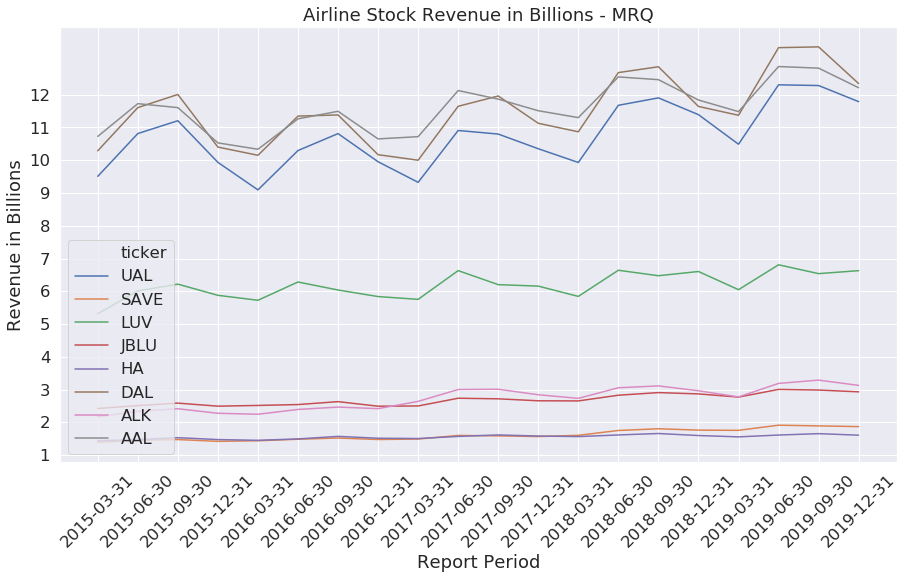

In [14]:
sns.lineplot(x='reportperiod',y='revenue',hue='ticker',data=MRQ)
plt.yticks(np.arange(100000000,12000000000,1000000000),np.arange(1,16,1))
plt.xticks(rotation=45)
plt.ylabel('Revenue in Billions')
plt.xlabel('Report Period')
plt.title('Airline Stock Revenue in Billions - MRQ')
plt.legend(loc='lower left')

From this chart we can see that there are three different categories of airlines based on revenue:
 - Large Airlines: United Airlines(UAL), American Airlines(AAL), Delta Airlines(DAL)
 - Medium Sized Airlines: Southwest(LUV)
 - Small Airlines: Spirit(SAVE), Jet Blue(JBLU), Hawaiian Airlines(HA), Alaska Airlines(ALK)
 
 Of the large airlines Delta has the highest revenue while United Airlines has the lowest revenues and of the small airlines Alaska airlines has the highest revenues while Hawaiian Airlines have the lowest revenue
 
 
 #### The data for this graph is displayed below:

In [15]:
scr = MRQ[['ticker','reportperiod','revenue']]
scr = scr[scr.reportperiod == '2019-12-31']
scr.sort_values(['revenue'],ascending=False)

,ticker,reportperiod,revenue
477,DAL,2019-12-31,11439000000
657,AAL,2019-12-31,11313000000
25,UAL,2019-12-31,10888000000
205,LUV,2019-12-31,5730000000
567,ALK,2019-12-31,2228000000
295,JBLU,2019-12-31,2031000000
115,SAVE,2019-12-31,969816000
385,HA,2019-12-31,708137000


### Operating Expenses

Operating expenses are any business expense incurred for regular operation of a business and can include rent, payroll, equipment, insurance etc.

Text(0.5,1,'Airline Stock Operating Expenses - MRQ')

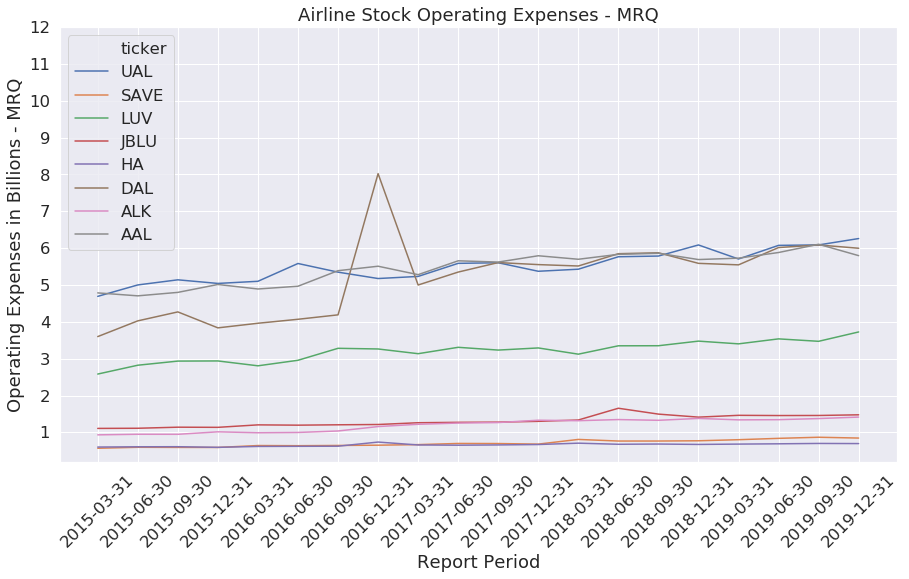

In [16]:
sns.lineplot(x='reportperiod',y='opex',hue='ticker',data=MRQ)
plt.yticks(np.arange(600000000,12000000000,1000000000),np.arange(1,13,1))
plt.ylabel('Operating Expenses in Billions - MRQ')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Operating Expenses - MRQ')

Of the large airlines it seems that United Airlines has the highest operating expenses but it also has the lowest revenues so United is not doing as good of job compared to the other large airlines in keeping operating expenses in check.  

For the small airlines Jetblue has the highest expenses and Hawaiian Airlines has the lowest operating expenses.

 #### The data for this graph is displayed below:

In [17]:
#Verifying with last report period
sc = MRQ[['ticker','reportperiod','opex']]
sc = sc[sc.reportperiod == '2019-12-31']
sc.sort_values(['opex'],ascending=False)

,ticker,reportperiod,opex
25,UAL,2019-12-31,5861000000
477,DAL,2019-12-31,5598000000
657,AAL,2019-12-31,5397000000
205,LUV,2019-12-31,3326000000
295,JBLU,2019-12-31,1077000000
567,ALK,2019-12-31,1015000000
115,SAVE,2019-12-31,446020000
385,HA,2019-12-31,296128000


# Comparing Airlines of different sizes
Although the last two graphs show how the airlines are performing against one another it is hard to see how well airlines of different sizes compare to one another.  To compare airlines of different sizes I will look at some ratios.

### Gross Margin 
According to Investopedia gross margin is the amount of money a company keeps after incurring direct costs associated with producing goods and services. The gross margin represents the amount of money the company keeps for everydollar it makes



Text(0.5,1,'Airline Stock Gross Margin - MRQ')

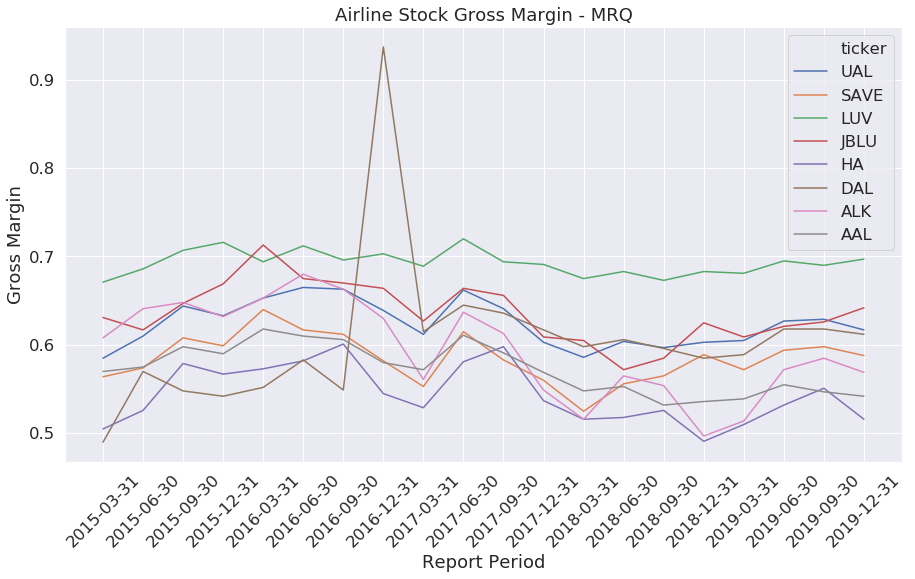

In [18]:
#Gross Margin Ratio
sns.lineplot(x='reportperiod',y='grossmargin',hue='ticker',data=MRQ)
plt.ylabel('Gross Margin')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Gross Margin - MRQ')

From the graph we can see that Southwest is doing a good job of keeping costs in check and earning a good proft margin. 

- Southwest Airlines keeps 0.69 for every dollar it spends
- Jetblue Airlines keeps 0.63 for every dollar it spends
- United Airlines keeps 0.62 for every dollar it spends
- Delta Airlines keeps 0.61 for every dollar it spends
- Spirit Airlines keeps 0.59 for every dollar it spends
- Alaska Airlines keeps 0.56 for every dollar it spends
- American Airlines keeps 0.55 for every dollar it spends
- Hawaiian Airlines keeps 0.53 for every dollar it spends


 #### The data for this graph is displayed below:

In [19]:
scgm = MRT[['ticker','reportperiod','grossmargin']]
scgm = scgm[scgm.reportperiod == '2019-12-31']
scgm.sort_values(['grossmargin'],ascending=False)

,ticker,reportperiod,grossmargin
185,LUV,2019-12-31,0.69
275,JBLU,2019-12-31,0.62
5,UAL,2019-12-31,0.62
457,DAL,2019-12-31,0.61
95,SAVE,2019-12-31,0.59
547,ALK,2019-12-31,0.56
637,AAL,2019-12-31,0.55
365,HA,2019-12-31,0.53


### Earnings Per Share

- Earnings per share(EPS) is calculated by dividing the companies profit by its outstanding shares.  
- EPS indicates how much money a company makes per share.  

Text(0.5,1,'Airline Stock Earnings Per Share - MRQ')

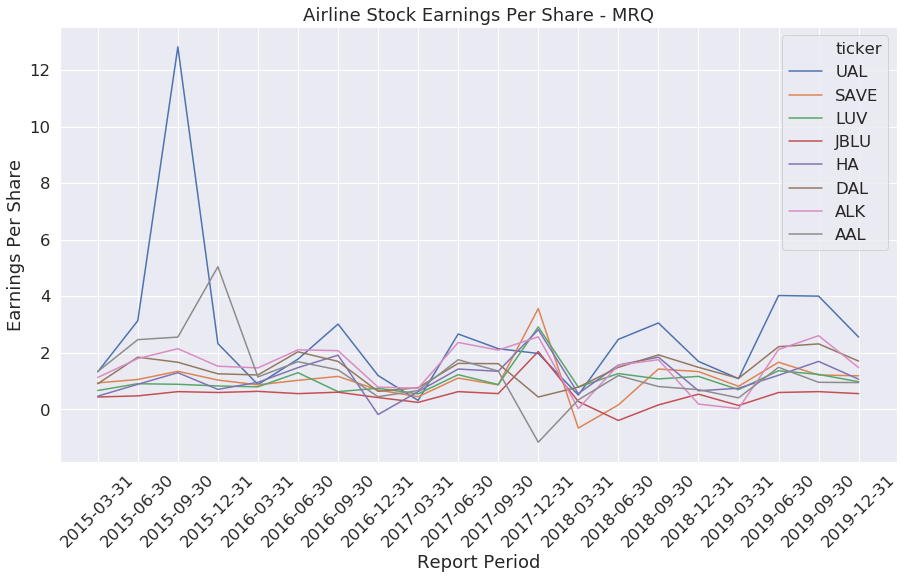

In [20]:
sns.lineplot(x='reportperiod',y='eps',hue='ticker',data=MRQ)
plt.ylabel('Earnings Per Share')
plt.xticks(rotation=45)
plt.xlabel('Report Period')
plt.title('Airline Stock Earnings Per Share - MRQ')

- United Airlines has the highest EPS. 
- Alaska Airlines which is a much smaller company has third highest EPS
- American Airlines who has the third largest revenue has the second to lowest EPS


 #### The data for this graph is displayed below:

In [21]:
sceps = MRQ[['ticker','reportperiod','eps']]
sceps = sceps[sceps.reportperiod == '2019-12-31']
sceps.sort_values(['eps'],ascending=False)

,ticker,reportperiod,eps
25,UAL,2019-12-31,2.56
477,DAL,2019-12-31,1.71
567,ALK,2019-12-31,1.48
115,SAVE,2019-12-31,1.19
385,HA,2019-12-31,1.07
205,LUV,2019-12-31,0.98
657,AAL,2019-12-31,0.95
295,JBLU,2019-12-31,0.56


### Price Earnings Ratio (PE)

- The PE ratio is calculated by dividing the share price by EPS
- PE ratio is used to compare share prices of different stocks
- A high PE ratio could mean the stock is overvalued
- If a company has not earning there will not be a PE ratio since you cannot have an EPS of zero in the denominator.

Text(0.5,1,'Airline Stock Price Earning Ratio - MRQ')

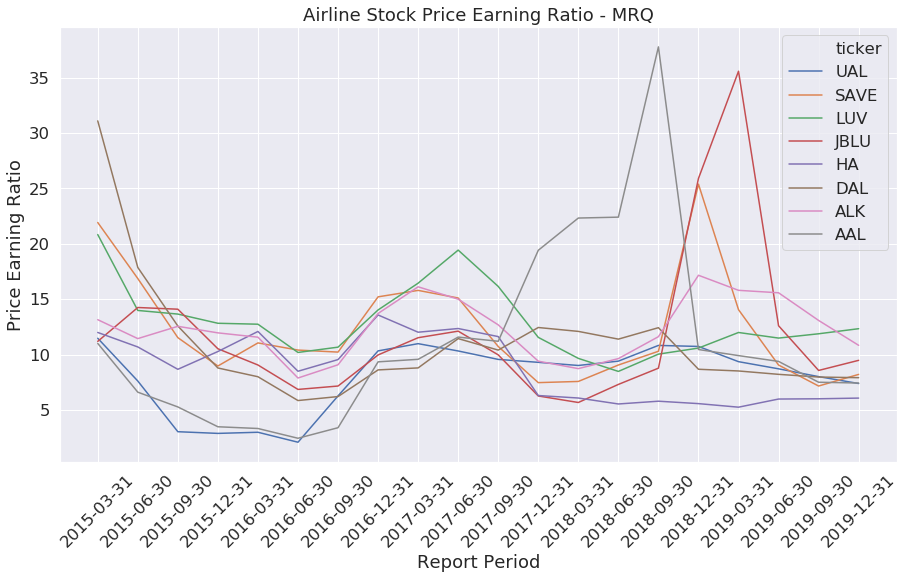

In [22]:
sns.lineplot(x='reportperiod',y='pe',hue='ticker',data=MRQ)
plt.ylabel('Price Earning Ratio')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Price Earning Ratio - MRQ')

- Southwest has the highest PE ratio
- Alaska Airlines has the second highest PE it also had the third highest EPS
- Jetblue has the third highest PE ratio it also had the lowest EPS


 #### The data for this graph is displayed below:

In [23]:
scpe = MRQ[['ticker','reportperiod','pe']]
scpe = scpe[scpe.reportperiod == '2019-12-31']
scpe.sort_values(['pe'],ascending=False)

,ticker,reportperiod,pe
205,LUV,2019-12-31,12.35
567,ALK,2019-12-31,10.85
295,JBLU,2019-12-31,9.50
115,SAVE,2019-12-31,8.23
477,DAL,2019-12-31,7.93
657,AAL,2019-12-31,7.45
25,UAL,2019-12-31,7.41
385,HA,2019-12-31,6.09


# Balance Sheet Metrics

### Debt to Equity Ratio

- The debt to equity ratio is calculated by dividing total liabilities by shareholder equity.
- The debt to equity ratio is used to determine how leveraged a company is. 
- A high debt to equity ratio means the company uses financing to fund operations instead of wholly owned funds. 

Text(0.5,1,'Airline Stock Debt to Equity')

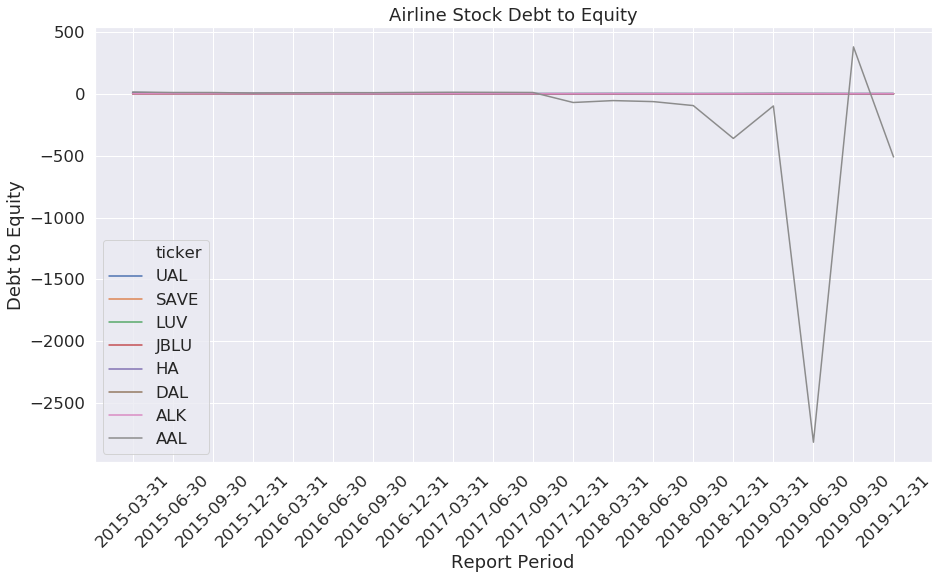

In [24]:
sns.lineplot(x='reportperiod',y='de',hue='ticker',data=MRQ)
plt.ylabel('Debt to Equity')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Debt to Equity')

 We see that American Airlines has some major fluctuations so lets drop american airlines and compare the other stocks

In [25]:
no_aal = stocks[stocks.ticker != 'AAL']

Text(0.5,1,'Airline Stock Debt to Equity Ratio')

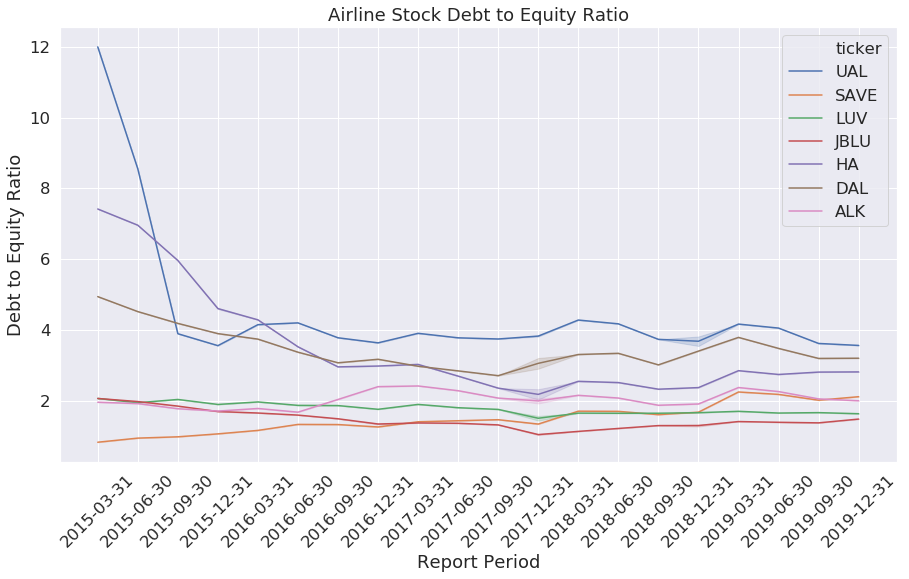

In [26]:
sns.lineplot(x='reportperiod',y='de',hue='ticker',data=no_aal)
plt.ylabel('Debt to Equity Ratio')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Debt to Equity Ratio')

- Jetblue and Southwest have the lowest debt to euity ratio
- American Airlines has a very low debt to equity ratio but this will require further investigation because of large fluctations 
- Hawaiian Airlines has fairly high debt to equity ratio for a small airline


 #### The data for this graph is displayed below:

In [27]:
scde = MRT[['ticker','reportperiod','de']]
scde = scde[scde.reportperiod == '2019-12-31']
scde.sort_values(['de'],ascending=False)

,ticker,reportperiod,de
5,UAL,2019-12-31,3.56
457,DAL,2019-12-31,3.20
365,HA,2019-12-31,2.81
95,SAVE,2019-12-31,2.12
547,ALK,2019-12-31,2.00
185,LUV,2019-12-31,1.63
275,JBLU,2019-12-31,1.48
637,AAL,2019-12-31,-509.43


### Current Ratio

- The Current Ratio measures the comapanies ability to pay short term obligations .
- Measures the ability of company to pay short term debt with current assets.
- Current Ratio's of less than one may not have enough cash on hand to pay all obligations at once.
- Current Ratio greater than three may indicate the company is not using its current assets efficiently.

Text(0.5,1,'Airline Stock Current Ratio - MRQ')

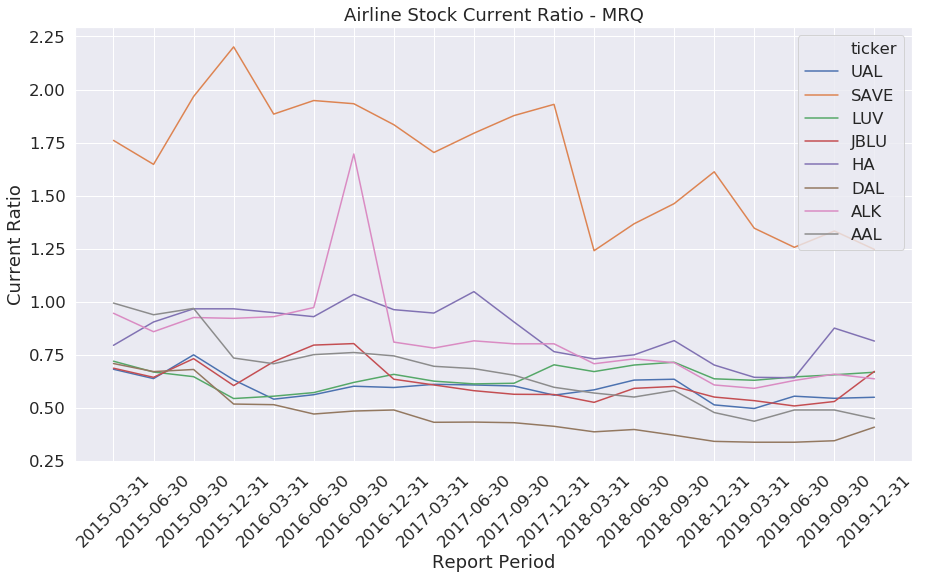

In [28]:
sns.lineplot(x='reportperiod',y='currentratio',hue='ticker',data=MRQ)
plt.ylabel('Current Ratio')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Current Ratio - MRQ')

- Only Spirit Airlines has a current ratio greater than one


 #### The data for this graph is displayed below:

In [29]:
sccr = MRQ[['ticker','reportperiod','currentratio']]
sccr = sccr[sccr.reportperiod == '2019-12-31']
sccr.sort_values(['currentratio'],ascending=False)

,ticker,reportperiod,currentratio
115,SAVE,2019-12-31,1.25
385,HA,2019-12-31,0.81
295,JBLU,2019-12-31,0.67
205,LUV,2019-12-31,0.67
567,ALK,2019-12-31,0.64
25,UAL,2019-12-31,0.55
657,AAL,2019-12-31,0.45
477,DAL,2019-12-31,0.41


### Return on Equity

- Return on Equity (ROE) is calculated by dividing net income by average sharholders equity 
- ROE measures how effectivly a company is using its assets to create profits
- ROE should be compared against industry average to determine how well a company is performing

Text(0.5,1,'Airline Stock Return on Equity')

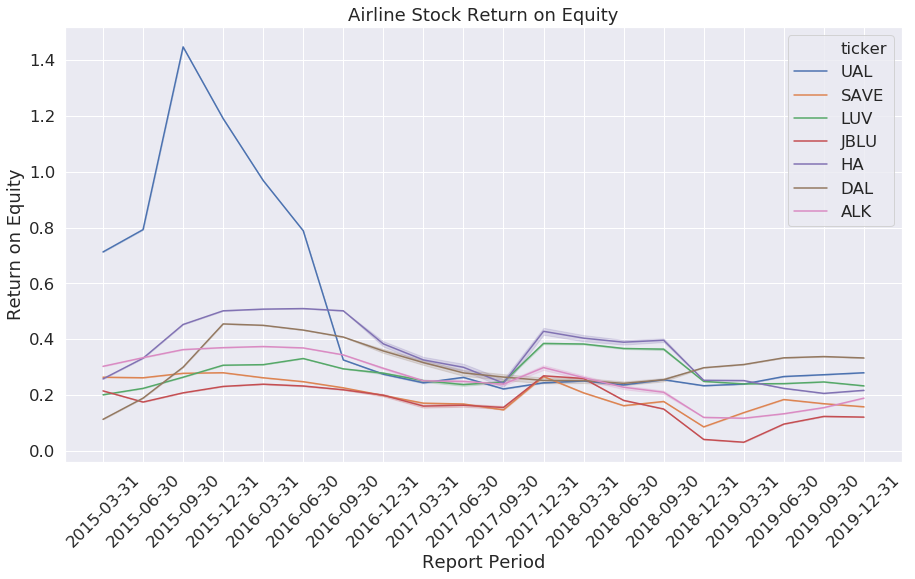

In [30]:
sns.lineplot(x='reportperiod',y='roe',hue='ticker',data=no_aal)
plt.ylabel('Return on Equity')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Return on Equity')

In [31]:
roe_avg = (.33+.28+.23+.22+.19+.16+.12)/7
print(f' The average return on equity is: {roe_avg:.2f}')

 The average return on equity is: 0.22


- Delta, United and Southwest have an above average ROE
- Jetblue has the lowest ROE


 #### The data for this graph is displayed below:

In [32]:
scroe = MRT[['ticker','reportperiod','roe']]
scroe = scroe[scroe.reportperiod == '2019-12-31']
scroe.sort_values(['roe'],ascending=False)
scroe

,ticker,reportperiod,roe
5,UAL,2019-12-31,0.28
95,SAVE,2019-12-31,0.16
185,LUV,2019-12-31,0.23
275,JBLU,2019-12-31,0.12
365,HA,2019-12-31,0.22
457,DAL,2019-12-31,0.33
547,ALK,2019-12-31,0.19
637,AAL,2019-12-31,-10.95


### Return on Invested Capital

- Return on Invested Capital (ROIC) is calculated by divided net operating profit after tax by invested capital.
- ROIC is the amount of return a company makes above average cost it pays for debt and equity capital.
- a company creates value if it ROIC exceeds 2% and destroys value if ROIC is less than 2%

Text(0.5,1,'Airline Stock Return on Invested Capital - MRT')

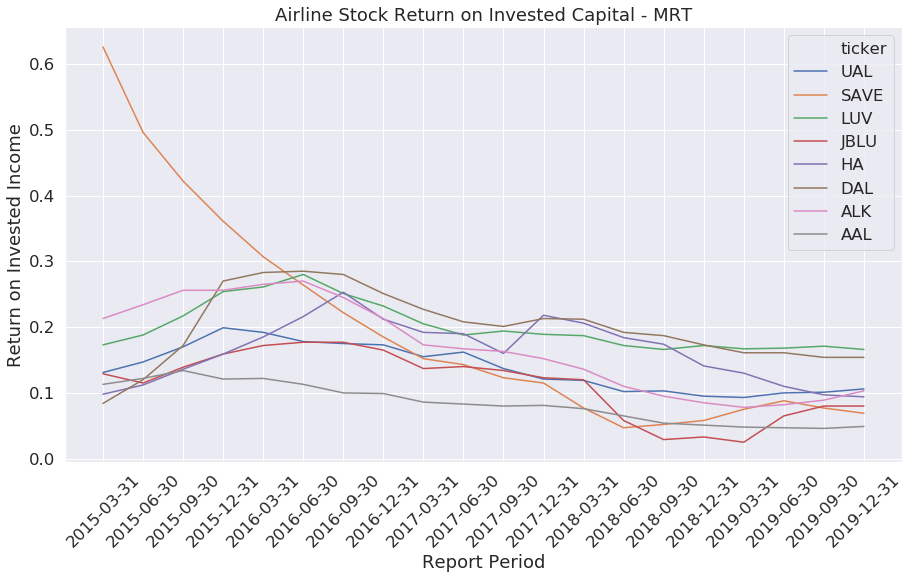

In [33]:
sns.lineplot(x='reportperiod',y='roic',hue='ticker',data=MRT)
plt.ylabel('Return on Invested Income')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Return on Invested Capital - MRT')

In [34]:
roic_avg = (0.17+0.15+0.11+0.10+0.09+0.08+0.07+0.05)/8
print(f' The average return on invested capital is: {roic_avg:.2f}')

 The average return on invested capital is: 0.10


- None of the airlines are creating value but Southwest, Delta and United Airlines are doing better than the average for the airline industry.


 #### The data for this graph is displayed below:

In [35]:
scroic = MRT[['ticker','reportperiod','roic']]
scroic = scroic[scroic.reportperiod == '2019-12-31']
scroic.sort_values(['roic'],ascending=False)

,ticker,reportperiod,roic
185,LUV,2019-12-31,0.17
457,DAL,2019-12-31,0.15
5,UAL,2019-12-31,0.11
547,ALK,2019-12-31,0.10
365,HA,2019-12-31,0.09
275,JBLU,2019-12-31,0.08
95,SAVE,2019-12-31,0.07
637,AAL,2019-12-31,0.05


### Return on Assets

- Return on Assets (ROA) is calculated by dividing net income by total assets.
- ROA measures how efficiently a company uses its assets to generate profits.
- The higher the ROA the more efficient a company is.

Text(0.5,1,'Airline Stock Return on Assets')

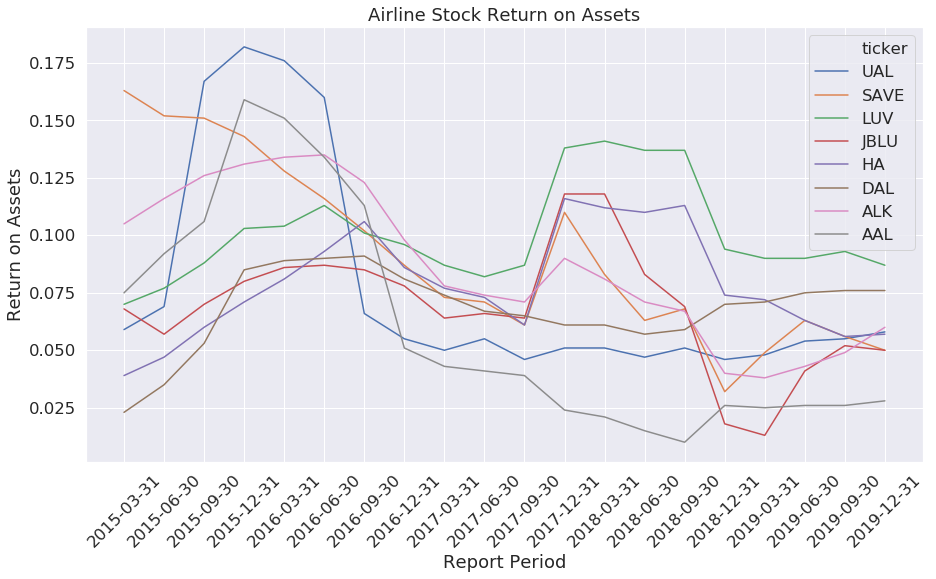

In [36]:
sns.lineplot(x='reportperiod',y='roa',hue='ticker',data=MRT)
plt.ylabel('Return on Assets')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Return on Assets')

- All the ROA ratios are very similar but Southwest is the most efficient and American Airlines and Jetblue are the least efficient.


 #### The data for this graph is displayed below:

In [37]:
scroa = MRT[['ticker','reportperiod','roa']]
scroa = scroa[scroa.reportperiod == '2019-12-31']
scroa.sort_values(['roa'],ascending=False)

,ticker,reportperiod,roa
185,LUV,2019-12-31,0.09
457,DAL,2019-12-31,0.08
547,ALK,2019-12-31,0.06
5,UAL,2019-12-31,0.06
365,HA,2019-12-31,0.06
95,SAVE,2019-12-31,0.05
275,JBLU,2019-12-31,0.05
637,AAL,2019-12-31,0.03


### Return on Sales

- Return on Sales (ROS) is calculated by dividing operating profit by net sales
- Measures how much profit is being produced per dollar of sales

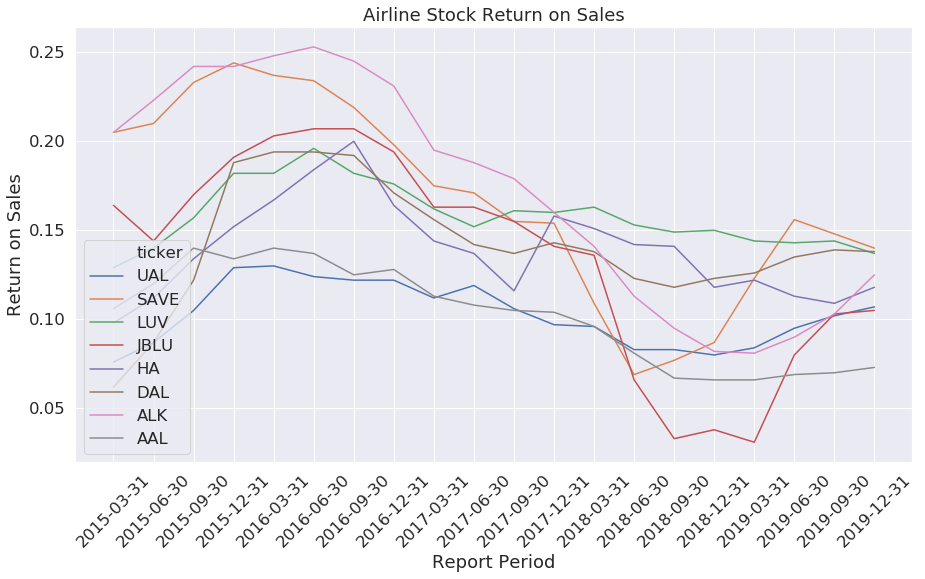

In [38]:
sns.lineplot(x='reportperiod',y='ros',hue='ticker',data=MRT)
plt.ylabel('Return on Sales')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Return on Sales')
plt.legend(loc='lower left')

- Delta, Southwest and Spirit Airlines are all tied for the top spot 
- American Airlines is significantly lower than the other airlines Jetblue is the second to last spot. 

 
 #### The data for this graph is displayed below:

In [39]:
scros = MRT[['ticker','reportperiod','ros']]
scros = scros[scros.reportperiod == '2019-12-31']
scros.sort_values(['ros'],ascending=False)

,ticker,reportperiod,ros
95,SAVE,2019-12-31,0.14
457,DAL,2019-12-31,0.14
185,LUV,2019-12-31,0.14
547,ALK,2019-12-31,0.12
365,HA,2019-12-31,0.12
5,UAL,2019-12-31,0.11
275,JBLU,2019-12-31,0.10
637,AAL,2019-12-31,0.07


# Cash Flow Statement Metrics

Due to data consistency on the Delta Cash Flow statement and the many cashflow metrics were unable to be accurarly verified but I included two metrics for demonstration purposes.

### Free Cash Flow

- Free cash flow (FCF) is the cash available to creditors and investors after operational expenses and investorsvestments in capital have been deducted.  

- FCF can reveal problems in the fundamentals before they appear on the income statement. 

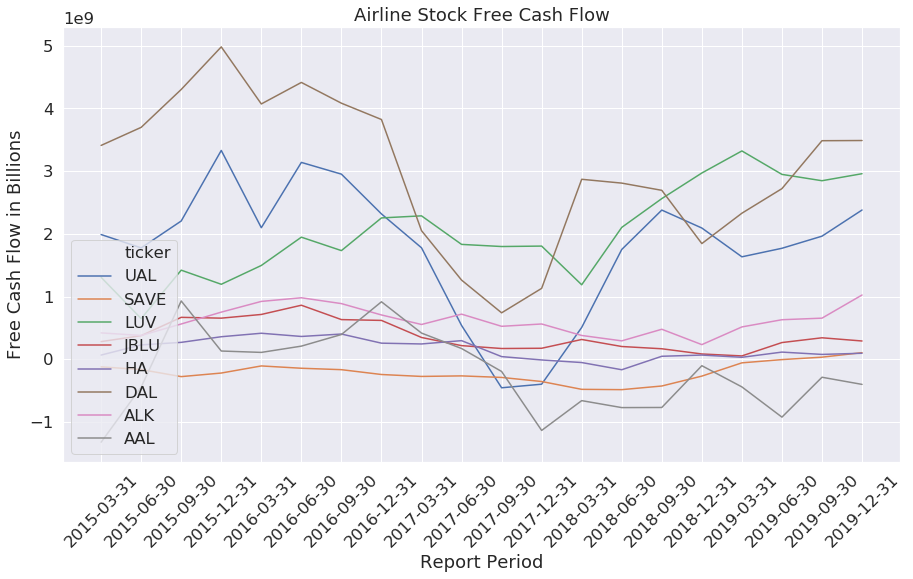

In [40]:
sns.lineplot(x='reportperiod',y='fcf',hue='ticker',data=MRT)
plt.ylabel('Free Cash Flow in Billions')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Free Cash Flow')
plt.legend(loc='lower left')

- Based on the graph Southwest and Delta have the most FCF. 
- Jetblue has the least FCF
- American Airlines has wild fluctuations 

In [41]:
scfo = MRT[['ticker','reportperiod','fcf']]
scfo = scfo[scfo.reportperiod == '2019-12-31']
scfo.sort_values(['fcf'],ascending=False)

,ticker,reportperiod,fcf
457,DAL,2019-12-31,3489000000
185,LUV,2019-12-31,2960000000
5,UAL,2019-12-31,2381000000
547,ALK,2019-12-31,1026000000
275,JBLU,2019-12-31,293000000
95,SAVE,2019-12-31,106746000
365,HA,2019-12-31,97314000
637,AAL,2019-12-31,-399000000


### Operating Cash Flow Ratio

- The operating cashflow ratio measures how well current liabilities are covered by cashflow generated by operations
- An operating cash flow ratio greater than one indicates the company has generated more cash than is needed to pay off current liabilities.

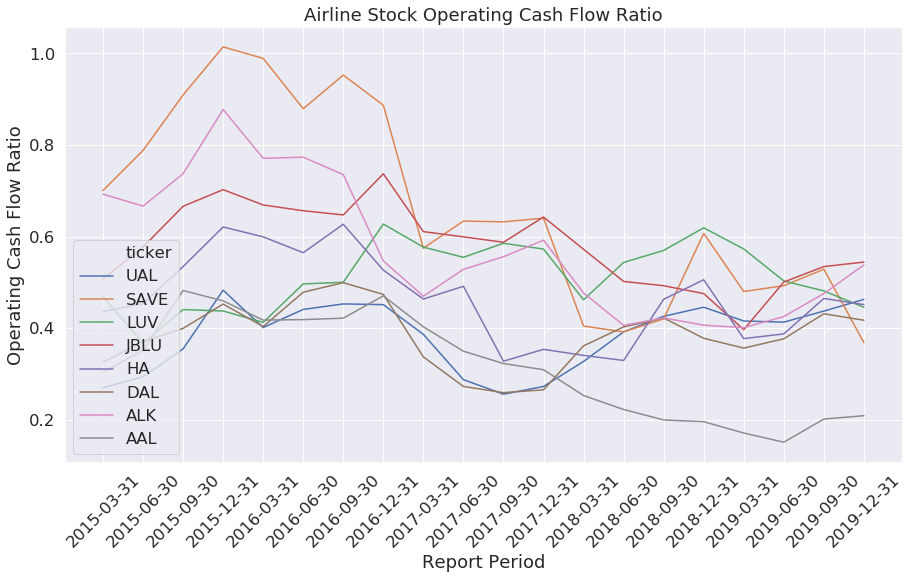

In [42]:
sns.lineplot(x=MRT['reportperiod'],y=MRT['ncfo']/MRT['liabilitiesc'],hue=MRT['ticker'])
plt.ylabel('Operating Cash Flow Ratio')
plt.xlabel('Report Period')
plt.xticks(rotation=45)
plt.title('Airline Stock Operating Cash Flow Ratio')
plt.legend(loc='lower left')

Based on the graph no airlines are currently generating enough income to pay for current liabilities.  Only Spirit Airlines was able to generate cashflow to pay for current liabilities in the last five years.  

## Conclusion
 
Based on this analysis Southwest Airliness is the clear leader by:
- Generating a higher Gross Margin.
- More efficiently using their equity and sales to generate profits. 
- Keeping Debt to Equity ratio low.
- Having enough cash on hand to pay current liabilties.

American Airlines is dealing with wild fluctuations so it will be hard to justify an investment based on fundamental data. Delta is doing the best of the large airlines and of the small airlines its too close to tell and would require further analysis.  

Overall the returns for the airline industry are trending downwards with return on sales, return on assets return on equity and return on invested capital all trending in slightly downward trajectory.  With downward returns trajectory and the current economic downturn due to the Coronavirus airline stocks have been hit very hard but this makes for a good buying opportunity Southwest Airlines is a well managed company and should be the leader when a turnaound comes.  